In [12]:
from scipy.stats import median_abs_deviation

import sys
sys.path.insert(0, '/home/workspace/mm_analysis')
sys.path.insert(0, '/home/workspace/')

from py_util import *
from utilities import *

hdir = '/home/workspace'
wdir = hdir + "/mm_analysis/EXP-01244"
objdir = wdir + "/processing/objects/"
degdir = wdir + "/deg_list/"

adata = sc.read_h5ad(objdir + "downsampled_processed_all_organoids_adata.h5ad")

adata_type = "All Organoids (downsampled)"

target = 'mono_'
labels = pd.read_csv(hdir + "/mm_analysis/bm_cell_label_reference.csv").iloc[:, 1:5]
labels = labels[labels.iloc[:,1].str.contains(target)]

exclude = ['CD16', 'GKMZ', 'HLA-DRA', 'ILRB2', 'ITGAE', 'STI4', 'VPREB2']

markers = {
    celltype: genes.split(", ")
    for celltype, genes in zip(labels.iloc[:, 1], labels.iloc[:, 2])
}

markers = {
    celltype: [gene for gene in genes if gene not in exclude]
    for celltype, genes in markers.items()
}

markers

{'mono_cd14': ['S100A9',
  'CCR2',
  'CD14',
  'FGR',
  'ITGAX',
  'CD34',
  'NCAM1',
  'ITGAM',
  'FCGR3A'],
 'mono_cd16': ['FCGR3A', 'IRF8', 'LY86', 'LST1', 'CD34', 'CD14'],
 'mono_intermediate': ['CCR5', 'FCGR3A', 'CD14', 'CD86']}

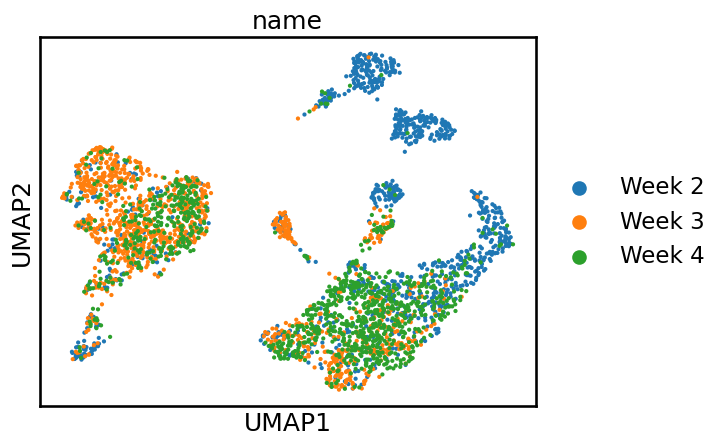

In [2]:
sc.pl.umap(
    adata,
    color='name'
)

Text(0.5, 0.93, 'All Organoids (downsampled): mono_cd14 markers')

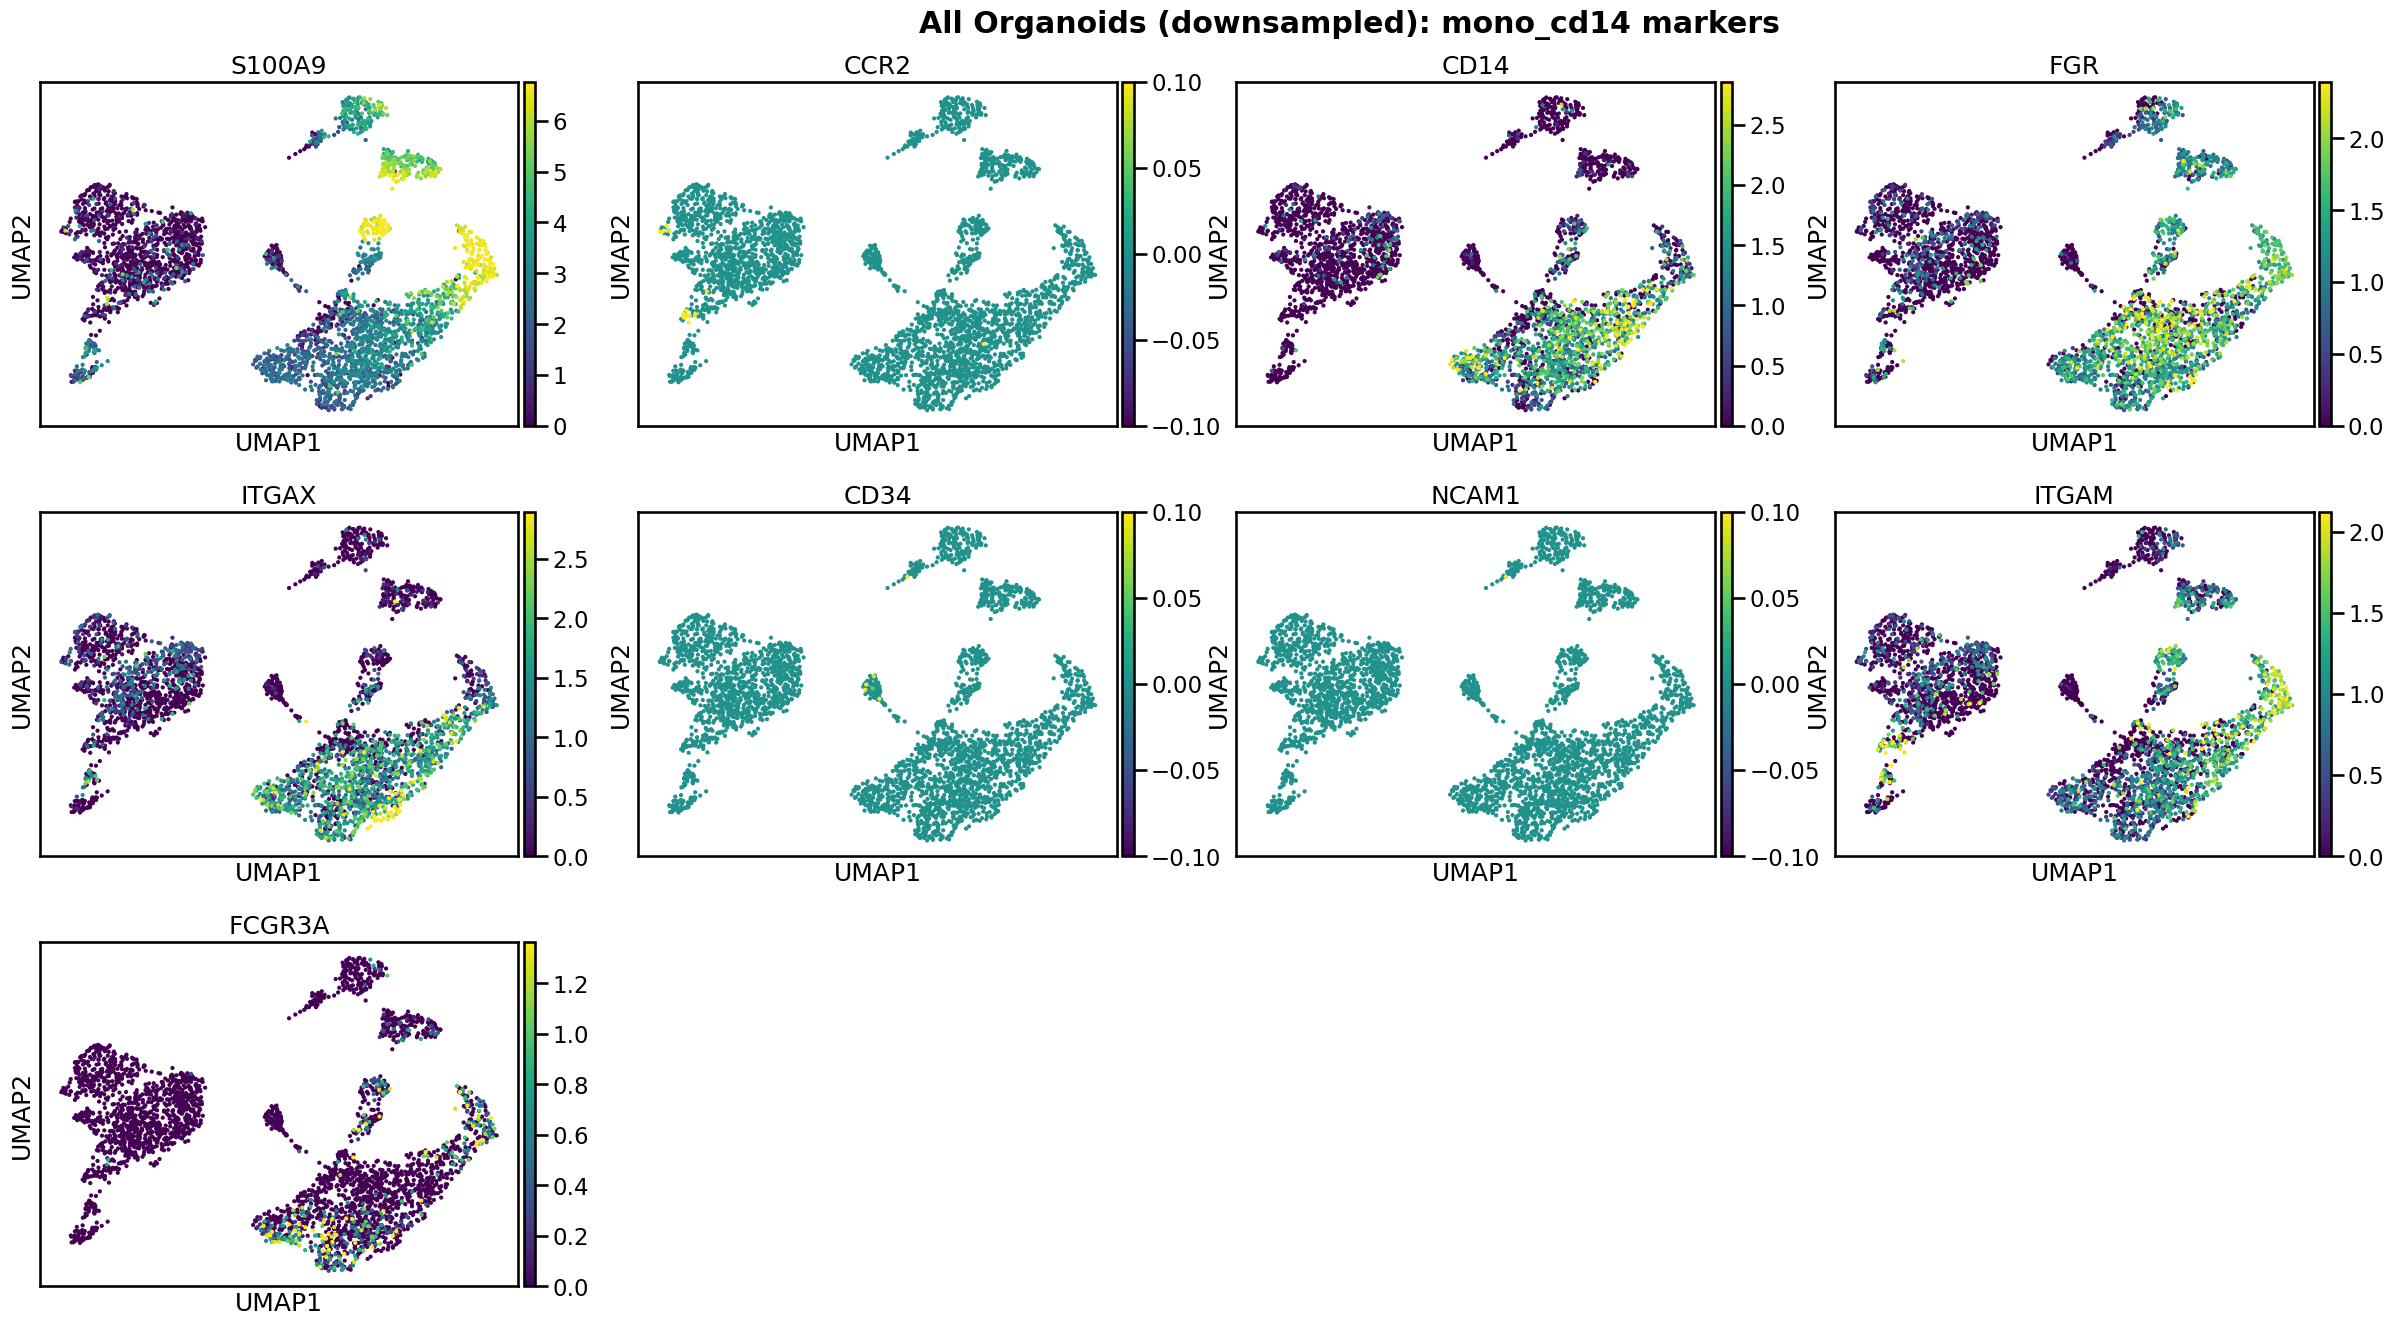

In [9]:
celltype = 'mono_cd14'

fig = sc.pl.umap(
    adata,
    color=markers[celltype],
    vmax='p99',
    show=False,
    return_fig=True
)

fig.suptitle(f'{adata_type}: {celltype} markers', y=.93, fontweight='bold')

Text(0.5, 0.97, 'mono_cd16 markers')

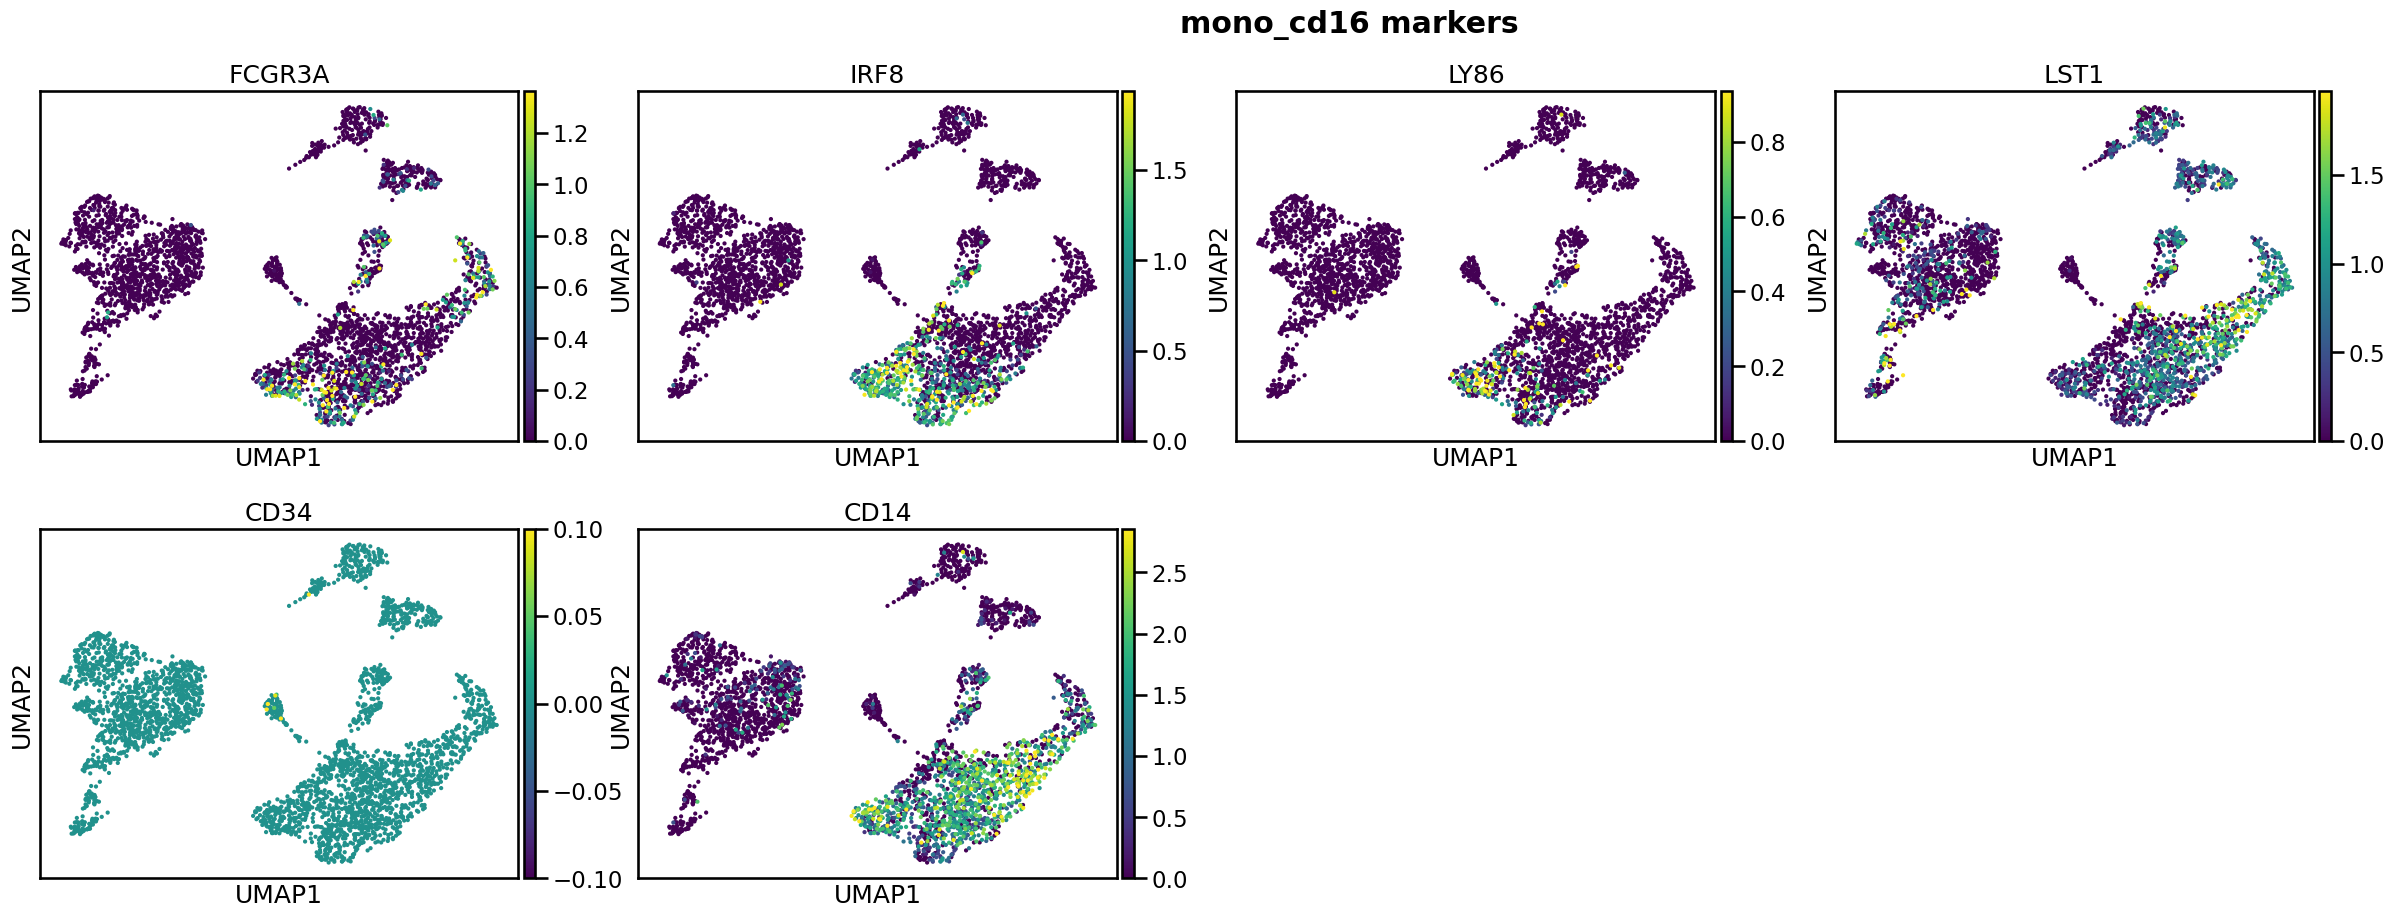

In [4]:
celltype = 'mono_cd16'

fig = sc.pl.umap(
    adata,
    color=markers[celltype],
    vmax='p99',
    show=False,
    return_fig=True
)

fig.suptitle(f'{adata_type}: {celltype} markers', y=0.97, fontweight='bold')

Text(0.5, 1.05, 'mono_intermediate markers')

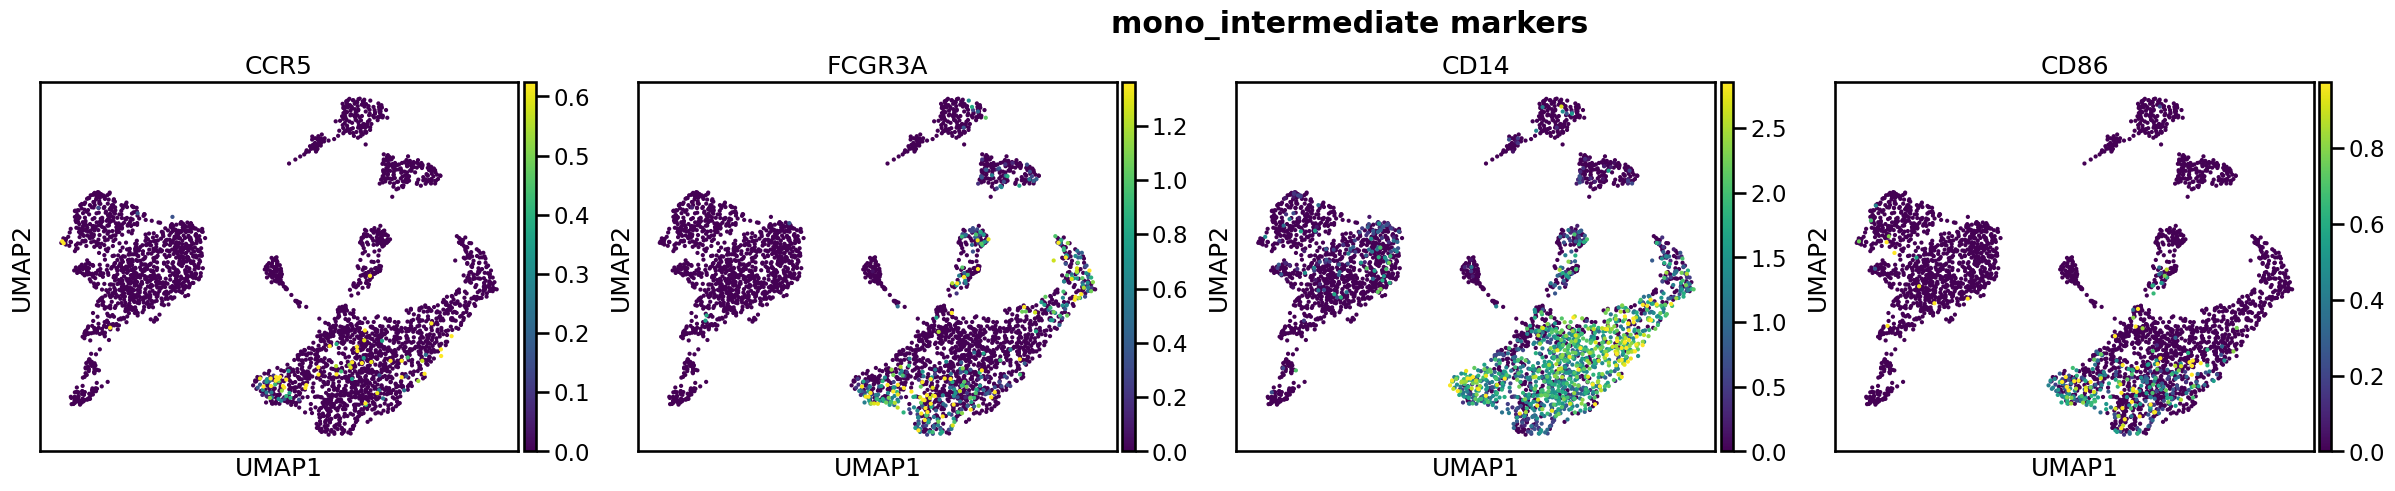

In [5]:
celltype = 'mono_intermediate'

fig = sc.pl.umap(
    adata,
    color=markers[celltype],
    vmax='p99',
    show=False,
    return_fig=True
)

fig.suptitle(f'{adata_type}: {celltype} markers', y=1.05, fontweight='bold')